In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#reading the IBM csv file
df = pd.read_csv('IBM.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 7 columns):
Date         1509 non-null object
Open         1509 non-null float64
High         1509 non-null float64
Low          1509 non-null float64
Close        1509 non-null float64
Adj Close    1509 non-null float64
Volume       1509 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 82.6+ KB


In [3]:
# Calculating the number of rows that make up first 70% of the data
round(df.shape[0]*0.7)

1056

In [4]:
# Splitting the first 70% of the data into train data
train = df[:1056]
train.shape

(1056, 7)

In [5]:
# Saving the rest as test data
test = df[1056:]
test.shape

(453, 7)

In [6]:
# Exporting train data into train.csv file
train.to_csv('train.csv')

In [7]:
# Exporting the test data into test.csv file
test.to_csv('test.csv')

In [10]:
# Reading the train data
dataset_train = pd.read_csv('train.csv')
dataset_train = dataset_train.drop('Unnamed: 0',1)
training_set = dataset_train.iloc[:, 1:2].values

In [11]:
#Scaling of data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [12]:
X_train = []
y_train = []
for i in range(60, 1056):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [13]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [14]:
# Importing required libraries for RNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

C:\Users\pvloh\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [15]:
regressor = Sequential()

In [16]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [17]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
996/996 [==============================] - 15s 15ms/step - loss: 0.0925
Epoch 2/100
996/996 [==============================] - 11s 11ms/step - loss: 0.0133
Epoch 3/100
996/996 [==============================] - 11s 11ms/step - loss: 0.0089
Epoch 4/100
996/996 [==============================] - 11s 11ms/step - loss: 0.0082
Epoch 5/100
996/996 [==============================] - 11s 11ms/step - loss: 0.0074
Epoch 6/100
996/996 [==============================] - 11s 11ms/step - loss: 0.0074
Epoch 7/100
996/996 [==============================] - 11s 11ms/step - loss: 0.0076
Epoch 8/100
996/996 [==============================] - 11s 11ms/step - loss: 0.0069
Epoch 9/100
996/996 [==============================] - 11s 11ms/step - loss: 0.0078
Epoch 10/100
996/996 [==============================] - 11s 11ms/step - loss: 0.0062
Epoch 11/100
996/996 [==============================] - 11s 11ms/step - loss: 0.0064
Epoch 12/100
996/996 [==============================] - 11s 11ms/step - lo

In [18]:
# importing the test data
dataset_test = pd.read_csv('test.csv')
dataset_test = dataset_test.drop('Unnamed: 0',1)
real_stock_price = dataset_test.iloc[:, 1:2].values

In [24]:
# Preprocessing and predicting with the help of test data
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 513):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

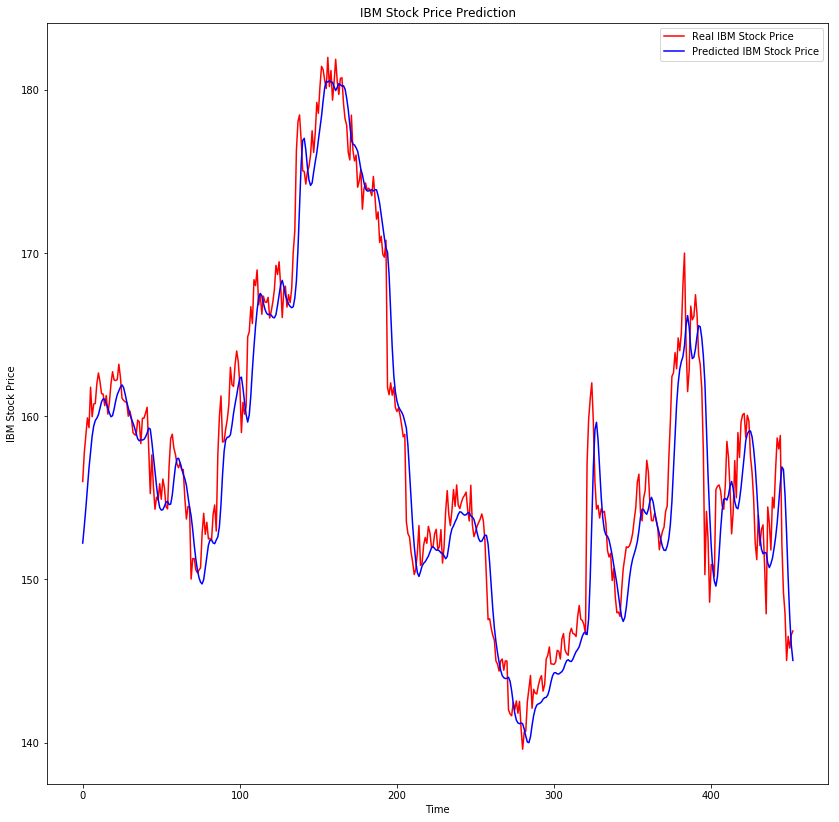

In [25]:
#Plotting the real IBM stock price VS Predicted one
plt.figure(figsize=(14,14))
plt.plot(real_stock_price, color = 'red', label = 'Real IBM Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted IBM Stock Price')
plt.title('IBM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('IBM Stock Price')
plt.legend()
plt.show()